https://garba.org/posts/2022/scoring_regression/

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
samples = 100
np.random.seed(0)

def add_outliers(array, step):
    return ([ v+(step/41) if i % step == 0 else v 
             for i,v in enumerate(array) ])

x = np.linspace(0.0,1.0,samples) 
r = np.random.rand(samples)    
y = np.array(list(map(lambda t: t[0]/2 + t[1]/5, zip(x,r))))
y_plus  = add_outliers(y,15)
y_minus = add_outliers(y,-15)
X = x.reshape(samples,-1) 

In [4]:
# Baseline
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [5]:
# Positive Outliers
X_train_plus, X_test_plus, y_train_plus, y_test_plus = train_test_split(X,y_plus,random_state=0)
model_plus = LinearRegression().fit(X_train_plus,y_train_plus)
y_pred_plus = model.predict(X_test_plus)

In [6]:
# Negative Outliers
X_train_minus, X_test_minus, y_train_minus, y_test_minus = train_test_split(X,y_minus,random_state=0)
model_minus = LinearRegression().fit(X_train_minus,y_train_minus)
y_pred_minus = model.predict(X_test_minus)

In [7]:

def visualise():
    plt.rcParams['figure.figsize'] = [16, 4]
    plt.rcParams['figure.dpi'] = 100 
    
    ax = plt.subplot(1, 3, 1)
    plt.title("Baseline")
    plt.scatter(X,y,s=0.5)
    plt.plot(X,model.predict(X),'-r', label="Prediction")
    plt.legend(loc='upper left')
    
    plt.subplot(1, 3, 2, sharey=ax)
    plt.title("Positive outliers")
    plt.scatter(X,y_plus,s=0.5)
    plt.plot(X,model_plus.predict(X),'-r', label="Prediction")
    plt.legend(loc='upper left')
    
    plt.subplot(1, 3, 3, sharey=ax)
    plt.title("Negative outliers")
    plt.scatter(X,y_minus,s=0.5)
    plt.plot(X,model_minus.predict(X),'-r', label="Prediction")
    plt.legend(loc='upper left')
    plt.show()

In [8]:
print("                   MAE        MSE        RMSE       MedAE      R2")
print("         Baseline: {:.8f} {:.8f} {:.8f} {:.8f} {:.8f}"
        .format(mean_absolute_error(y_test, y_pred),
                mean_squared_error(y_test,y_pred),
                mean_squared_error(y_test,y_pred,squared=False),
                median_absolute_error(y_test,y_pred),
                r2_score(y_test,y_pred)))
print("Positive Outliers: {:.8f} {:.8f} {:.8f} {:.8f} {:.8f}"
        .format(mean_absolute_error(y_test_plus, y_pred_plus),
                mean_squared_error(y_test_plus,y_pred_plus),
                mean_squared_error(y_test_plus,y_pred_plus,squared=False),
                median_absolute_error(y_test_plus,y_pred_plus),
                r2_score(y_test_plus,y_pred_plus)))
print("Negative Outliers: {:.8f} {:.8f} {:.8f} {:.8f} {:.8f}"       
        .format(mean_absolute_error(y_test_minus, y_pred_minus),
                mean_squared_error(y_test_minus,y_pred_minus),
                mean_squared_error(y_test_minus,y_pred_minus,squared=False),
                median_absolute_error(y_test_plus,y_pred_minus),
                r2_score(y_test_minus,y_pred_minus)))    


                   MAE        MSE        RMSE       MedAE      R2
         Baseline: 0.05046426 0.00339777 0.05829042 0.05499852 0.84103010
Positive Outliers: 0.08362021 0.01648675 0.12840072 0.05757718 0.53651638
Negative Outliers: 0.09174612 0.02243254 0.14977495 0.05757718 0.36711532


/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


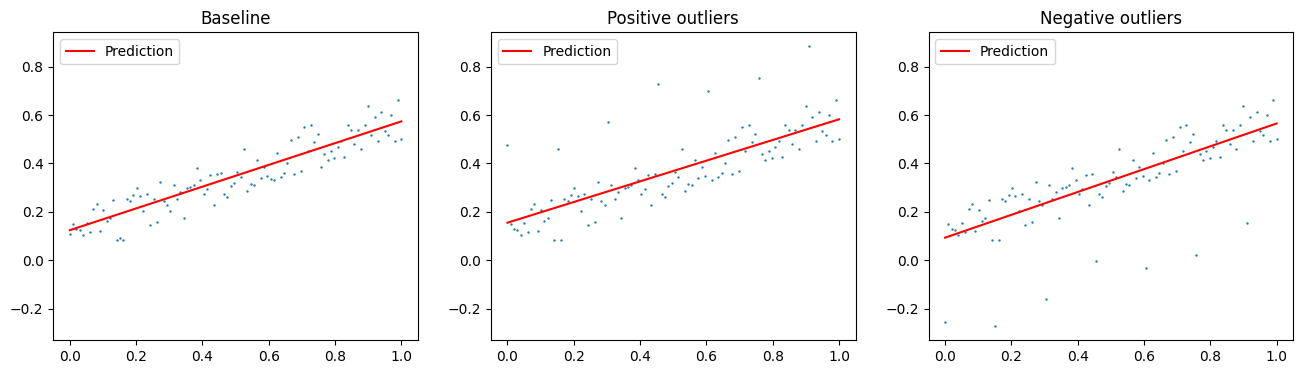

In [9]:
visualise()